# Introduction

* __Objective__
 * Build an end-to-end predictive machine learning model that can take any new song we like and predict its genre. 
 
 
* __Goals__
 * Find premade datasets and or curate a training set that's based on Spotify's API for the predictive model. 
 * Implement basic preprocessing & EDA and feature analysis (engineering, selection, etc).
 * Develop a model that shows good intelligence in genre prediction, also include a random baseline model for comparison. 
 * Assess which genres were better predicted and which ones didn't do as well.
 * Build a __prediction function__ that you can give a song title __and__ artist to that's capable of querying Spotify's API to drive a predictive guess on what the genre could be.
 
 
* __Initial Questions__
    * What are the average tempo & energy, key for different genres?
    * What about the most popular songs, in each genre, and what's their tempo & energy?
    * Can a song's musical elements (valence, loudness, instrumentalness, bpm) strongly indicate whether or not it belongs to a specific genre?

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math as mt
import plotly.express as px

: 

In [4]:
# data = pd.read_csv("/Users/monte/Desktop/dataset.csv")
data = pd.read_csv("/Users/monte/Desktop/dataset.csv")

## Data Wrangling

In [5]:
# this function retrieves info on...
def dataset_info(df):
    # Potential Dups
    print("..... Duplicate Rows .....")
    print(f'Total Duplicates: {df.duplicated().sum()}\n')

    # A DF's Shape
    print("\n..... DataFrame Shape .....")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("\n")
    
    # Potential missing values 
    print("..... Missing Values .....")
    print(df.isna().sum(), '\n')
    
    # A DF's basic info
    print("..... DataFrame Information .....") 
    df.info()
    print("\n")
     
    # Any particular column's unique values
    print("..... Unique Values per Column .....")
    for column in df.columns:
        unique_vals = df[column].nunique()
        print(f'{column}: {unique_vals} unique values')
    print("\n")

    # A DF's first 10 rows
    print("..... DataFrame Head .....")
    display(df.head(10))
    
    # A DF's 10 Sample rows
    print("..... DataFrame's Sampled Rows .....")
    display(df.sample(10))
    return

In [6]:
def mins_rounded(seconds):
    duration = seconds / 1000
    return mt.ceil(duration)
data['secs_rounded'] = data['duration_ms'].apply(mins_rounded)

In [7]:
dataset_info(data)

..... Duplicate Rows .....
Total Duplicates: 0


..... DataFrame Shape .....
Rows: 114000, Columns: 22


..... Missing Values .....
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
secs_rounded        0
dtype: int64 

..... DataFrame Information .....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 no

Unnamed: 0                track_id                               artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5           5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6           6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7           7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   
8           8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat   
9           9  7k9GuJYLp2AzqokyEdwEw2                        Ross Copperman   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   
5                               Days I Will Remember   
6                        Is There Anybody Out There?   
7                We Sing. We Dance. We Steal Things.   
8                We Sing. We Dance. We Steal Things.   
9                                             Hunger   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   
5        Days I Will Remember          58       214240     False   
6               Say Something          74       229400     False   
7                   I'm Yours          80       242946     False   
8                       Lucky          74       189613     False   
9                      Hunger          56       205594     False   

   danceability  energy  ...  mode  speechiness  acousticness  \
0         0.676  0.4610  ...     0       0.1430        0.0322   
1         0.420  0.1660  ...     1       0.0763        0.9240   
2         0.438  0.3590  ...     1       0.0557        0.2100   
3         0.266  0.0596  ...     1       0.0363        0.9050   
4         0.618  0.4430  ...     1       0.0526        0.4690   
5         0.688  0.4810  ...     1       0.1050        0.2890   
6         0.407  0.1470  ...     1       0.0355        0.8570   
7         0.703  0.4440  ...     1       0.0417        0.5590   
8         0.625  0.4140  ...     1       0.0369        0.2940   
9         0.442  0.6320  ...     1       0.0295        0.4260   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  \
0          0.000001    0.3580   0.7150   87.917               4     acoustic   
1          0.000006    0.1010   0.2670   77.489               4     acoustic   
2          0.000000    0.1170   0.1200   76.332               4     acoustic   
3          0.000071    0.1320   0.1430  181.740               3     acoustic   
4          0.000000    0.0829   0.1670  119.949               4     acoustic   
5          0.000000    0.1890   0.6660   98.017               4     acoustic   
6          0.000003    0.0913   0.0765  141.284               3     acoustic   
7          0.000000    0.0973   0.7120  150.960               4     acoustic   
8          0.000000    0.1510   0.6690  130.088               4     acoustic   
9          0.004190    0.0735   0.1960   78.899               4     acoustic   

   secs_rounded  
0           231  
1           150  
2           211  
3           202  
4           199  
5           215  
6           230  
7           243  
8       

..... DataFrame's Sampled Rows .....


Unnamed: 0                track_id                artists  \
72422        72422  4YhHPtAVCxj7HfcvGTBHAC              Spiritbox   
34810        34810  1kcYfi1mkfhnJYntYSi9gb          Prateek Kuhad   
21950        21950  7nT9lGk3bf5rvnVbzPIE3N           Collie Buddz   
47829        47829  2LbGrzVnDIsuDOAcb0TZSy      Charlie Brown Jr.   
38238        38238  50jXnyrzW4mcBBqFTMEoAC  Death From Above 1979   
18223        18223  3CwkgAtc3CaEuSBB84b6dL            Kyle Kinane   
106216      106216  17OqI90oTFZ3J8PVu6j07V                   ABBA   
102810      102810  367ziQUc9DfcL0HU6M3YQU             Anupam Roy   
63157        63157  32CwLhZJBa6C5Q0bJe0Q47          Brian the Sun   
113121      113121  7pV7A75agkBv5Vnl3PqvwD       Hillsong Worship   

                             album_name                      track_name  \
72422                        Blessed Be                      Blessed Be   
34810   Prateek Kuhad on Audiotree Live  Drown - Audiotree Live Version   
21950                            Hybrid                   Love & Reggae   
47829                 Imunidade Musical                   O Nosso Blues   
38238                   Outrage! Is Now                       Freeze Me   
18223                Death of the Party                          Voices   
106216                      Voulez-Vous                     Voulez-Vous   
102810                        Autograph   Aamake Aamar Moto Thaakte Dao   
63157                          パトスとエートス                          HEROES   
113121                    There Is More             God So Loved - Live   

        popularity  duration_ms  explicit  danceability  energy  ...  mode  \
72422           56       245830     False         0.484  0.9180  ...     0   
34810           34       194214     False         0.501  0.0713  ...     1   
21950           58       213691     False         0.743  0.5760  ...     0   
47829           36       328240     False         0.670  0.9070  ...     1   
38238           57       198081     False         0.511  0.7240  ...     1   
18223           24       368400      True         0.569  0.5650  ...     1   
106216          70       309173     False         0.708  0.7740  ...     0   
102810          36       321410     False         0.551  0.4090  ...     1   
63157           55       181360     False         0.526  0.9400  ...     1   
113121          49       271986     False         0.454  0.5250  ...     1   

        speechiness  acousticness  instrumentalness  liveness  valence  \
72422        0.0672      0.000391           0.02910    0.1050    0.399   
34810        0.0554      0.950000           0.00195    0.1100    0.418   
21950        0.1630      0.013600           0.00000    0.0613    0.628   
47829        0.0558      0.363000           0.00777    0.4240    0.950   
38238        0.0311      0.000826           0.00019    0.2300    0.536   
18223        0.9450      0.816000           0.00000    0.8910    0.672   
106216       0.0372      0.149000           0.00109    0.1690    0.903   
102810       0.0378      0.749000           0.00000    0.1730    0.219   
63157        0.0660      0.007420           0.00000    0.2680    0.574   
113121       0.0284      0.026700           0.00000    0.2000    0.329   

          tempo  time_signature  track_genre  secs_rounded  
72422   105.046               4    metalcore           246  
34810   163.324               4         folk           195  
21950    77.958               4    dancehall           214  
47829   155.142               4    hard-rock           329  
38238   130.029               4       garage           199  
18223    72.590               3       comedy           369  
106216  126.636               4      swedish           310  
102810  148.105               4   songwriter           322  
63157    99.058               4       j-rock           182  
113121  138.932               4  world-music           272  

[10 rows x 22 columns]

### Checking for Duplicate and Missing Values

In [8]:
data[data['artists'].isna()]

Unnamed: 0                track_id artists album_name track_name  \
65900       65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

       popularity  duration_ms  explicit  danceability  energy  ...  mode  \
65900           0            0     False         0.501   0.583  ...     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature  track_genre  secs_rounded  
65900  138.391               4        k-pop             0  

[1 rows x 22 columns]

### Renaming Columns

In [9]:
data.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'secs_rounded'],
      dtype='object')

In [10]:
data = data.rename(
columns = {
    "Unnamed: 0": 'unnamed_0',
    "album_name": "album",
    "artists": "artist",
    "track_genre": "genre",
})

In [11]:
data.columns

Index(['unnamed_0', 'track_id', 'artist', 'album', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'genre', 'secs_rounded'],
      dtype='object')

### Dropping Columns

In [12]:
data = data.dropna()
data = data.drop(columns=['unnamed_0', 'track_id'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist            113999 non-null  object 
 1   album             113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   explicit          113999 non-null  bool   
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             113999 

## Exploratory Data Analysis

In [13]:
# Given there are 114 genres with each having 1,000 songs (excluding kpop having 999), I will use the parent genres and ignore the sub-, child genres (i.e. pop: k-pop, j-pop, power-pop, rock: alt-rock, punk-rock, hard-rock, rock-and-roll etc).
# * Thus simplfying it down to 5 genres: Pop, Rock, Hip-Hop, R&B, and EDM and;
# * Reduce the genres' length down to 120 songs per genre, totaling to 600 rows of data -- from 114k rows.

In [14]:
# Dictionary to map sub-genres to main genres
main_genre_map = {
    'rock': ['rock', 'alternative', 'grunge', 'punk', 'emo', 'goth', 'grindcore', 'hardcore', 'indie'],
    'pop': ['pop', 'british', 'children', 'dance', 'party'],
    'electronic': ['edm', 'electro', 'electronic', 'house', 'techno', 'trance', 'minimal-techno', 'progressive-house', 'deep-house', 'detroit-techno', 'chicago-house'],
    'hip-hop': ['hip-hop', 'rap'],
    'jazz': ['jazz', 'blues'],
    'classical': ['classical', 'opera', 'piano'],
    'latin': ['latin', 'salsa', 'reggaeton', 'samba', 'mpb', 'pagode', 'sertanejo'],
    'country': ['country', 'bluegrass', 'honky-tonk'],
    'reggae': ['reggae', 'dub', 'dancehall'],
    'world': ['afrobeat', 'brazil', 'turkish', 'iranian', 'indian', 'malay', 'french', 'german', 'spanish', 'swedish', 'tango', 'world-music'],
    'rnb_soul': ['r-n-b', 'soul', 'funk', 'disco'],
    'other': ['anime', 'chill', 'ambient', 'new-age', 'gospel', 'comedy', 'show-tunes', 'study', 'sleep', 'kids', 'songwriter', 'singer-songwriter']
}

# Create a function to map sub-genres to main genres
def map_to_main_genre(sub_genre):
    for main_genre, sub_genres in main_genre_map.items():
        if sub_genre in sub_genres:
            return main_genre
    return 'other'  # Default to 'other' if no match

# Apply the mapping function to the 'genre' column in your dataframe
data['genre'] = data['genre'].apply(map_to_main_genre)

print(data)


                        artist  \
0                  Gen Hoshino   
1                 Ben Woodward   
2       Ingrid Michaelson;ZAYN   
3                 Kina Grannis   
4             Chord Overstreet   
...                        ...   
113995           Rainy Lullaby   
113996           Rainy Lullaby   
113997           Cesária Evora   
113998        Michael W. Smith   
113999           Cesária Evora   

                                                    album  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                    

In [15]:
g = data['genre'].unique()
g

array(['other', 'world', 'rock', 'country', 'jazz', 'pop', 'electronic',
       'classical', 'reggae', 'rnb_soul', 'hip-hop', 'latin'],
      dtype=object)

In [16]:
data['genre'].unique()

array(['other', 'world', 'rock', 'country', 'jazz', 'pop', 'electronic',
       'classical', 'reggae', 'rnb_soul', 'hip-hop', 'latin'],
      dtype=object)

In [17]:
# main_genres = ['pop', 'rock', 'hip-hop', 'r-n-b', 'edm']

# def filter_genre(df, genres):
#     return df[df['genre'].isin(genres)]

# filtered_df = filter_genre(data, main_genres) #this takes the function above and filters the sub-genres away from main ones

# sampled_df = [] #this is the actual filtering for-loop
# for genre in main_genres:
#     genre_df = filtered_df[filtered_df['genre'] == genre]  # filters the genres
#     sampled_songs = genre_df.sample(n=200, random_state=12345)  # Get 120 songs per genre
#     sampled_df.append(sampled_songs)

# data = pd.concat(sampled_df)
# print(datahape)

In [18]:
new_g = data['genre'].unique()
new_g

array(['other', 'world', 'rock', 'country', 'jazz', 'pop', 'electronic',
       'classical', 'reggae', 'rnb_soul', 'hip-hop', 'latin'],
      dtype=object)

In [19]:
# # sanity check bar chart
# g = data.drop(columns=['artist', 'album','explicit', 'duration_ms'], axis=1)
# genres = g.groupby('genre')['track_name'].count().sort_values()
# genres.plot(kind='bar', edgecolor='black')
# plt.title("Genre ")
# plt.xlabel("Range of Songs that are Danceable")
# plt.ylabel("Number of Songs")
# plt.show()

In [20]:
dataset_info(data)

..... Duplicate Rows .....
Total Duplicates: 10447


..... DataFrame Shape .....
Rows: 113999, Columns: 20


..... Missing Values .....
artist              0
album               0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
genre               0
secs_rounded        0
dtype: int64 

..... DataFrame Information .....
<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist            113999 non-null  object 
 1   album             113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999

artist  \
0                           Gen Hoshino   
1                          Ben Woodward   
2                Ingrid Michaelson;ZAYN   
3                          Kina Grannis   
4                      Chord Overstreet   
5                          Tyrone Wells   
6  A Great Big World;Christina Aguilera   
7                            Jason Mraz   
8             Jason Mraz;Colbie Caillat   
9                        Ross Copperman   

                                               album  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   
5                               Days I Will Remember   
6                        Is There Anybody Out There?   
7                We Sing. We Dance. We Steal Things.   
8                We Sing. We Dance. We Steal Things.   
9                                             Hunger   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   
5        Days I Will Remember          58       214240     False   
6               Say Something          74       229400     False   
7                   I'm Yours          80       242946     False   
8                       Lucky          74       189613     False   
9                      Hunger          56       205594     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   
5         0.688  0.4810    6    -8.807     1       0.1050        0.2890   
6         0.407  0.1470    2    -8.822     1       0.0355        0.8570   
7         0.703  0.4440   11    -9.331     1       0.0417        0.5590   
8         0.625  0.4140    0    -8.700     1       0.0369        0.2940   
9         0.442  0.6320    1    -6.770     1       0.0295        0.4260   

   instrumentalness  liveness  valence    tempo  time_signature  genre  \
0          0.000001    0.3580   0.7150   87.917               4  other   
1          0.000006    0.1010   0.2670   77.489               4  other   
2          0.000000    0.1170   0.1200   76.332               4  other   
3          0.000071    0.1320   0.1430  181.740               3  other   
4          0.000000    0.0829   0.1670  119.949               4  other   
5          0.000000    0.1890   0.6660   98.017               4  other   
6          0.000003    0.0913   0.0765  141.284               3  other   
7          0.000000    0.0973   0.7120  150.960               4  other   
8          0.000000    0.1510   0.6690  130.088               4  other   
9          0.004190    0.0735   0.1960   78.899               4  other   

   secs_rounded  
0           231  
1           150  
2           211  
3           202  
4           199  
5           215  
6           230  
7           243  
8           190  
9           206

..... DataFrame's Sampled Rows .....


artist  \
71731                             Linkin Park   
90625                          Owe Thörnqvist   
26299  Doctora Juguetes;Felpita;Lambie;Hallie   
4182                                Balmorhea   
14398                          Rolf Zuckowski   
9019                               Jota Quest   
90012                             Chuck Berry   
85195                              Last Child   
51031         AP Dhillon;Shinda Kahlon;Gminxr   
50706                                   Lordi   

                                       album                track_name  \
71731          Hybrid Theory (Bonus Edition)                 Forgotten   
90625                         Sverigebesöket                    Näcken   
26299  Doctora Juguetes: Ya Llegó la Doctora           Cierra Tus Ojos   
4182              All Is Wild, All Is Silent               Remembrance   
14398         Heia - Rolfs kleine Nachtmusik   Komm Schlaf, komm Traum   
9019                     Acústico Jota Quest          Fácil - Acústico   
90012          Santa Claus Is Coming To Town           Run Rudolph Run   
85195                 Our Biggest Thing Ever  Percayalah - Bonus Track   
51031                            HIDDEN GEMS                 SPACESHIP   
50706               To Beast or Not to Beast    Candy for the Cannibal   

       popularity  duration_ms  explicit  danceability  energy  key  loudness  \
71731          61       194426     False         0.615   0.947    8    -3.817   
90625          32       168133     False         0.625   0.783    7    -5.431   
26299          25        52213     False         0.327   0.251   11    -9.002   
4182           61       349200     False         0.452   0.131    6   -13.163   
14398          35       174826     False         0.504   0.189    8   -12.369   
9019           54       229540     False         0.556   0.537    7   -10.761   
90012           0       162897     False         0.647   0.876   10    -5.662   
85195          45       208823     False         0.449   0.785    2    -5.664   
51031          73       124498     False         0.690   0.683    5    -7.186   
50706          21       282733     False         0.484   0.953    2    -7.097   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
71731     0       0.1100       0.01320          0.000000    0.3660    0.498   
90625     1       0.0387       0.61500          0.000000    0.0727    0.935   
26299     1       0.0328       0.90300          0.000275    0.1390    0.446   
4182      0       0.0324       0.47000          0.898000    0.0604    0.143   
14398     1       0.0349       0.83700          0.000015    0.1030    0.252   
9019      1       0.0282       0.37700          0.000000    0.7570    0.313   
90012     1       0.1850       0.88100          0.000036    0.2600    0.949   
85195     1       0.0391       0.09930          0.000000    0.2380    0.417   
51031     0       0.0968       0.07600          0.000113    0.1340    0.549   
50706     1       0.0662       0.00256          0.000094    0.2730    0.481   

         tempo  time_signature    genre  secs_rounded  
71731  108.193               4    other           195  
90625   92.543               4    other           169  
26299  202.984               4    other            53  
4182   121.276               3    other           350  
14398  103.916               4      pop           175  
9019    95.914               4    world           230  
90012  151.925               4    other           163  
85195  169.940               4    other           209  
51031  160.088               4  hip-hop           125  
50706  148.032               4    other           283

In [21]:
music_magic = data.drop(columns=['artist', 'album', 'track_name','explicit', 'genre', 'duration_ms'], axis=1)
music_magic.describe()

# notes
# On a scale from 0-100; the avg popularity for a song is at 36.
# On a scale of 0-1; the avg danceability is 0.63%
# On a scale of 0-1; the avg energy is at 0.66%
# On a scale of 0-1; the avg valence/happiness a song has is at 0.53
# On a scale of 0-243; the avg is 123 bpm (this is a moderate standard tempo)
# On a scale of 43-594 (in seconds | but 43 seconds to 9m 54s); the avg is 218 seconds (3 mins 38s)
# ig we're going with genre, popularity, danceability and tempo? -- I need to do a correlation matrix

popularity   danceability         energy            key  \
count  113999.000000  113999.000000  113999.000000  113999.000000   
mean       33.238827       0.566801       0.641383       5.309126   
std        22.304959       0.173543       0.251530       3.559999   
min         0.000000       0.000000       0.000000       0.000000   
25%        17.000000       0.456000       0.472000       2.000000   
50%        35.000000       0.580000       0.685000       5.000000   
75%        50.000000       0.695000       0.854000       8.000000   
max       100.000000       0.985000       1.000000      11.000000   

            loudness           mode    speechiness   acousticness  \
count  113999.000000  113999.000000  113999.000000  113999.000000   
mean       -8.258950       0.637558       0.084652       0.314907   
std         5.029357       0.480708       0.105733       0.332522   
min       -49.531000       0.000000       0.000000       0.000000   
25%       -10.013000       0.000000       0.035900       0.016900   
50%        -7.004000       1.000000       0.048900       0.169000   
75%        -5.003000       1.000000       0.084500       0.597500   
max         4.532000       1.000000       0.965000       0.996000   

       instrumentalness       liveness        valence          tempo  \
count     113999.000000  113999.000000  113999.000000  113999.000000   
mean           0.156051       0.213554       0.474066     122.147695   
std            0.309556       0.190378       0.259261      29.978290   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.000000       0.098000       0.260000      99.218500   
50%            0.000042       0.132000       0.464000     122.017000   
75%            0.049000       0.273000       0.683000     140.071000   
max            1.000000       1.000000       0.995000     243.372000   

       time_signature   secs_rounded  
count   113999.000000  113999.000000  
mean         3.904034     228.513329  
std          0.432623     107.298806  
min          0.000000       9.000000  
25%          4.000000     175.000000  
50%          4.000000     213.000000  
75%          4.000000     262.000000  
max          5.000000    5238.000000

On a scale from 0 to 100, the average popularity of a song is 33. In terms of danceability, the average score is .56. While the average energy level is slightly higher at 0.64. The average valence, which measures the happiness of a song, is recorded at 0.47. When examining tempo, the average beats per minute (BPM) is 122, representing a moderate standard tempo. Lastly, the average song duration is 228 seconds.

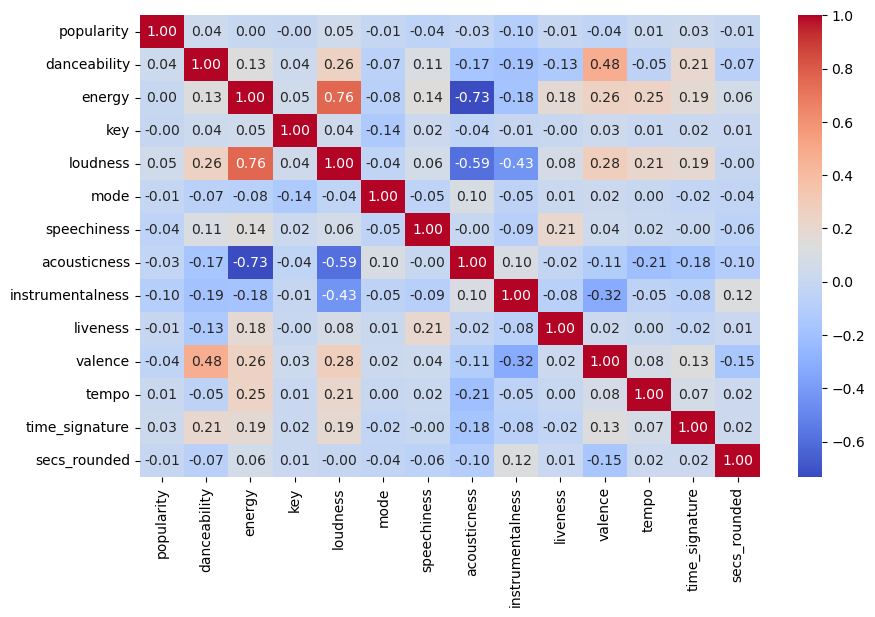

In [22]:
# Filter numeric columns from the DataFrame
numeric_data = music_magic.select_dtypes(include=[float, int])

# Calculate the correlation matrix on the numeric data
music_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(music_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# this interactive plotly matrix works
# fig = px.imshow(music_matrix, aspect="auto")
# fig.show()

#notes
# the 2 strongest correlations I'm seeing is Energy & Loudness + Danceability & Valence.
# So Genre is going to be largest comparison to the other audible features

I want to create a full visual analysis (pie chart, smth else) but also respectively for all 5 genres in the form of a function. 
analyzing them from a -- key(bar), energy, loudness, tempo (histogram), danceability, valence(pie)

In [23]:
#this is a curated df meant to showcase the numerical data visually based on genres' features
visuals = data.drop(columns=['artist', 'album'], axis=1)

# segmented genres
p_visuals = visuals[visuals['genre'] == 'pop'] 
r_visuals = visuals[visuals['genre'] == 'rock'] 
hh_visuals = visuals[visuals['genre'] == 'hip-hop'] 
rnb_visuals = visuals[visuals['genre'] == 'r-n-b'] 
edm_visuals = visuals[visuals['genre'] == 'edm']

In [24]:
fig = px.scatter(visuals, x="energy", y="loudness",
	         size="key", color="genre",
                 hover_name="valence", log_x=True, size_max=15, title='Energy and Loudness Grouped by Genre') #changing the size_max scales the circles' sizes
fig.show()

In this scatterplot it visualizes songs between energy and loudness. The circle size of each scatter point is determined by the key of the song. The higher key values represents songs with higher key values and the smaller circles represent songs with lower key values.

The trend with this scatterplot seems to be a positive relationship between energy and loudness, which makes sense since high energy songs are often louder, and low energy songs tend to be softer.  

In [67]:
fig = px.bar(visuals, x="genre", y="key", color="explicit", title="Explicit Lyrics by Genre")
fig.show()

After analyzing the bar graphs for the genres we are working with, it becomes clear that there is a distinct difference between songs with explicit lyrics and those without. The data shows that the hip-hop genre has the highest number of songs containing explicit lyrics, while the rock genre features significantly fewer explicit tracks.

## All Genre Line-Ups

### Pop Visuals

In [25]:
fig = px.scatter(p_visuals, x="energy", y="loudness",
	         size="key", color="valence",
                 hover_name="genre", log_x=True, size_max=30, title='Energy vs Loudness of Songs Categorized by Valence') #changing the size_max scales the circles' sizes
fig.show()

In [27]:
p_visuals['valence'].describe()

count    5000.000000
mean        0.574800
std         0.249856
min         0.027300
25%         0.386000
50%         0.595500
75%         0.780250
max         0.988000
Name: valence, dtype: float64

In this scatter plot, we examine the relationship between energy and loudness, categorized by the valence of the songs. Valence refers to the mood of the song, with higher values indicating happier emotions and lower values suggesting sadder or more negative moods.

In our dataset, the mean valence for pop songs is approximately 0.53, indicating a generally positive mood. Additionally, 75% of the pop songs have a valence of 0.72 or lower, which shows that a significant portion of pop songs tends to be more upbeat.

This analysis suggests that energy and loudness are correlated with the valence of the songs, helping to identify their emotional content.

In [29]:
fig = px.sunburst(p_visuals, path=['explicit', 'key', 'tempo'], values='popularity',
                  title='Pop Genre Popularity Scale - Categorized by the Lyrical Explicitness, their keys and tempo')
#the values here start from center to outer and its popularity is viewed via hovering.
fig.show()

In the sunburst chart we created, it visualizes the lyrical explicitness, key, and tempo of songs. The songs are divided into non-explicit, represented by blue, and explicit songs, represented by red. Most songs are categorized as non-explicit, as this occupies the majority of the chart. The chart is divided into three sections: the center categorizes the songs by explicitness (non-explicit or explicit), the second layer represents the keys of the songs, and the third layer illustrates the tempo of the songs.

### Rock Genre

In [71]:
fig = px.scatter(r_visuals, x="energy", y="loudness",
	         size="key", color="valence",
                 hover_name="genre", log_x=True, size_max=30, title='Energy vs Loudness of Songs Categorized by Valence') #changing the size_max scales the circles' sizes
fig.show()

In [72]:
r_visuals['valence'].describe()

count    1000.000000
mean        0.538903
std         0.234430
min         0.058200
25%         0.355750
50%         0.546000
75%         0.718000
max         0.976000
Name: valence, dtype: float64

In this scatter plot, we also compare the energy of the songs to their loudness, categorized by the valence of the songs. As shown by the visual and the descriptive statistics, the average valence for rock songs is approximately 0.547992, indicating a generally positive mood. Additionally, 75% of the rock songs have a valence of 0.699250 or lower, suggesting that most rock songs tend to be upbeat. In contrast, 25% of the songs have a valence of 0.369750, indicating that a portion of rock songs may convey more negative or sadder emotions.

In [73]:
fig = px.sunburst(r_visuals, path=['explicit', 'key', 'tempo'], values='popularity',
                  title='Rock Genre Popularity Scale - Categorized by the Lyrical Explicitness, their keys and tempo')
#the values here start from center to outer and its popularity is viewed via hovering.
fig.show()

We also created a sunburst chart to visualize the lyrical explicitness, key, and tempo for the rock genre. The center of the sunburst chart represents the explicitness of the songs, categorized as explicit (red) and non-explicit (blue). As you can see, most of the songs in the rock genre are categorized as non-explicit. The second layer represents the key of the songs, ranging from 0 to 11, while the outer layer displays the tempo of the songs.

### Hip-Hop Genre

In [74]:
fig = px.scatter(hh_visuals, x="energy", y="loudness",
	         size="key", color="valence",
                 hover_name="genre", log_x=True, size_max=30, title='Energy vs Loudness of Songs Categorized by Valence in Hip-Hop') #changing the size_max scales the circles' sizes
fig.show()

In [75]:
hh_visuals['valence'].describe()

count    1000.000000
mean        0.551248
std         0.224913
min         0.037200
25%         0.388750
50%         0.550000
75%         0.722000
max         0.965000
Name: valence, dtype: float64

According to the scatter plot we created, the darker colors represent lower valence, while the lighter colors indicate higher valence for hip-hop songs. You can see that most of the songs are in lighter colors, suggesting they have a higher valence. Hip-hop songs have a mean valence of approximately 0.569016, with 75% of the songs having a valence of 0.744250. Compared to the previous genres, this indicates that hip-hop has a more positive mood than both rock and pop.

In [76]:
fig = px.sunburst(hh_visuals, path=['explicit', 'key', 'tempo'], values='popularity',
                  title='Hip-Hop Genre Popularity Scale - Categorized by the Lyrical Explicitness, their keys and tempo')
#the values here start from center to outer and its popularity is viewed via hovering.
fig.show()

In this sunburst chart, we compared lyrical explicitness with key and tempo. Although hip-hop has a higher valence than rock and pop, we can observe that this genre contains more than 25% of songs with explicit lyrics.

### R&B Genre

In [77]:
fig = px.scatter(rnb_visuals, x="energy", y="loudness",
	         size="key", color="valence",
                 hover_name="genre", log_x=True, size_max=30, title='Energy vs Loudness of Songs Categorized by Valence in RnB Genre') #changing the size_max scales the circles' sizes
fig.show()

In [78]:
rnb_visuals['valence'].describe()

count    1000.000000
mean        0.633164
std         0.241621
min         0.036400
25%         0.455000
50%         0.650000
75%         0.847250
max         0.994000
Name: valence, dtype: float64

he R&B genre exhibits a more scattered pattern compared to the previous charts (hip-hop, rock, and pop). According to the visual provided, 75% of the songs in the R&B genre have a valence of 0.81, indicating that most of the songs convey a more positive mood. In contrast, 25% of the songs have a valence of 0.43, suggesting that a portion of R&B songs may have a darker or more negative emotional tone.

In [79]:
fig = px.sunburst(rnb_visuals, path=['explicit', 'key', 'tempo'], values='popularity',
                  title='RnB Genre Popularity Scale - Categorized by the Lyrical Explicitness, their keys and tempo')
#the values here start from center to outer and its popularity is viewed via hovering.
fig.show()

In [80]:
rnb_visuals['key'].describe()

count    1000.000000
mean        5.743000
std         3.504173
min         0.000000
25%         2.000000
50%         7.000000
75%         9.000000
max        11.000000
Name: key, dtype: float64

In [81]:
rnb_visuals['tempo'].describe()

count    1000.000000
mean      124.038939
std        28.431107
min        51.037000
25%       101.502000
50%       124.378500
75%       143.860500
max       206.641000
Name: tempo, dtype: float64

In this sunburst chart created for the R&B genre, we can see that the majority of the songs do not have explicit lyrics. The average key for R&B songs is 5.7, which suggests that songs in a higher key may sound brighter and more energetic, while those in a lower key may sound deeper and more relaxed. Notably, 75% of the songs have a key value of 9 or higher, indicating a tendency towards more energetic keys, while 25% of the songs have a key value of 2, suggesting that a portion of the songs is more relaxed.

Regarding tempo, 75% of the R&B songs have a tempo of 140 BPM or higher, which is considered a high tempo (over 120 BPM). Conversely, 25% of the songs have a lower tempo, generally considered to be 100 BPM or less.

### EDM Genre

In [82]:
fig = px.scatter(edm_visuals, x="energy", y="loudness",
	         size="key", color="valence",
                 hover_name="genre", log_x=True, size_max=30, title='Energy vs Loudness for EDM Songs Categorized by Valence') #changing the size_max scales the circles' sizes
fig.show()

In [83]:
edm_visuals['valence'].describe()

count    1000.000000
mean        0.465198
std         0.198346
min         0.034100
25%         0.318000
50%         0.466000
75%         0.619000
max         0.962000
Name: valence, dtype: float64

While comparing energy and loudness by the valence of the songs, we can see that the EDM genre in our dataset has a mean valence of approximately 0.439007, making it the lowest among the genres analyzed. Additionally, 75% of the EDM songs have a valence of 0.62, while 25% have a valence of 0.283500.

In [84]:
fig = px.sunburst(edm_visuals, path=['explicit', 'key', 'tempo'], values='popularity',
                  title='EDM Genre Popularity Scale - Categorized by the Lyrical Explicitness, their keys and tempo')
#the values here start from center to outer and its popularity is viewed via hovering.
fig.show()

In [85]:
edm_visuals['key'].describe()

count    1000.000000
mean        5.754000
std         3.508246
min         0.000000
25%         2.000000
50%         6.000000
75%         8.000000
max        11.000000
Name: key, dtype: float64

In [86]:
edm_visuals['tempo'].describe()

count    1000.000000
mean      122.037299
std        22.292960
min        73.735000
25%       105.076000
50%       123.010500
75%       127.852500
max       213.928000
Name: tempo, dtype: float64

In [87]:
edm_visuals['explicit'].value_counts()

explicit
False    894
True     106
Name: count, dtype: int64

After comparing explicit lyrics, key, and tempo in the EDM genre, we see that there are a total of 109 songs without explicit lyrics and 11 songs that do contain explicit lyrics. This means that approximately 9% of the total EDM songs have explicit lyrics, while 91% do not.

The average key for the EDM genre is 5.62, indicating that most songs fall in the middle range rather than being distinctly high or low. The average tempo of EDM songs is 123.79 BPM, which is considered upbeat, suggesting that the majority of EDM tracks maintain a lively and energetic pace.



### Danceability

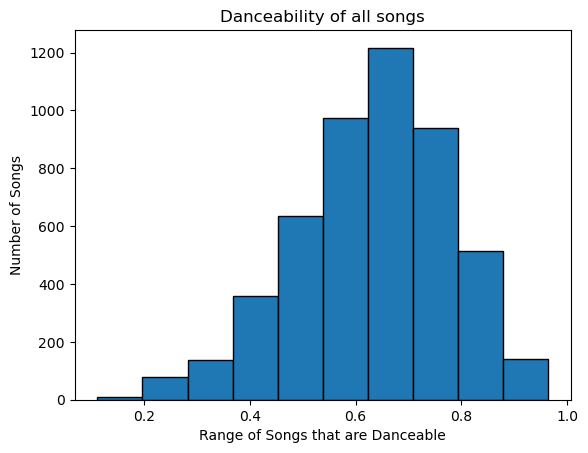

In [88]:
data['danceability'].plot(
kind='hist', edgecolor='black')
plt.title("Danceability of all songs")
plt.xlabel("Range of Songs that are Danceable")
plt.ylabel("Number of Songs")
plt.show()

By creating a histogram of the danceability of the songs, we can observe that it follows a normal distribution. The histogram is bell-shaped, featuring a single peak, with most values clustering around the mean.

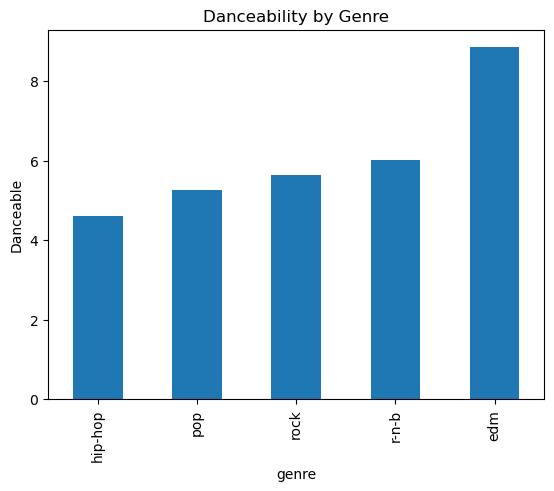

In [89]:
bar_graph = data.sample(50).groupby("genre")["danceability"].sum().sort_values()
bar_graph.plot(kind="bar",
              title="Danceability by Genre",
              ylabel = "Danceable")
plt.show()

After grouping the data by genre, we sampled 50 values to graph the danceability of each genre. The results show that EDM is the most danceable genre, while rock is the least danceable. Additionally, hip-hop has a slight edge over R&B in terms of danceability.

### Loudness

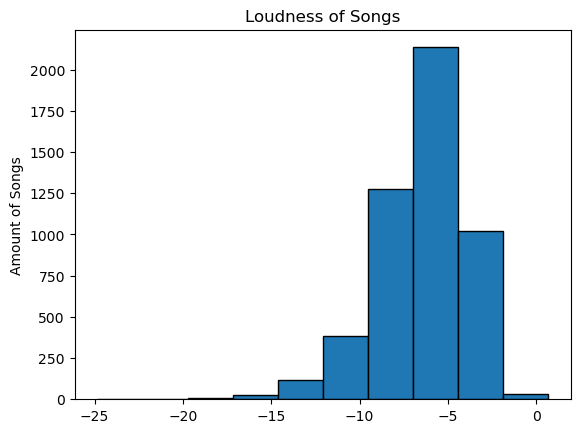

In [90]:
data['loudness'].plot(
kind='hist', edgecolor='black')
plt.title("Loudness of Songs")
plt.ylabel("Amount of Songs")
plt.show()

Considering the loudness of the songs in our dataframe, the histogram demonstrates a normal distribution, characterized by a bell-shaped curve. Most values are concentrated around the mean, indicating that the loudness levels of the songs follow this typical pattern.

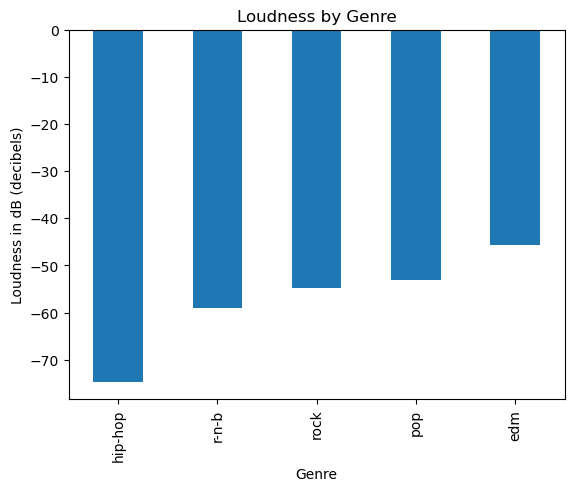

In [91]:
# Sample 50 values and group by genre, summing the loudness
bar_graph = data.sample(50).groupby("genre")["loudness"].sum().sort_values()

# Create a bar graph
bar_graph.plot(kind="bar",
               title="Loudness by Genre",
               ylabel="Loudness in dB (decibels)",
               xlabel="Genre")

# Show the plot
plt.show()


In the histogram above, we plotted the loudness of various genres using decibels (dB) as the measurement tool. The genre with the lowest decibel level is rock, followed by R&B, pop, and hip-hop. The genre with the highest decibel level is EDM.

### Popularity

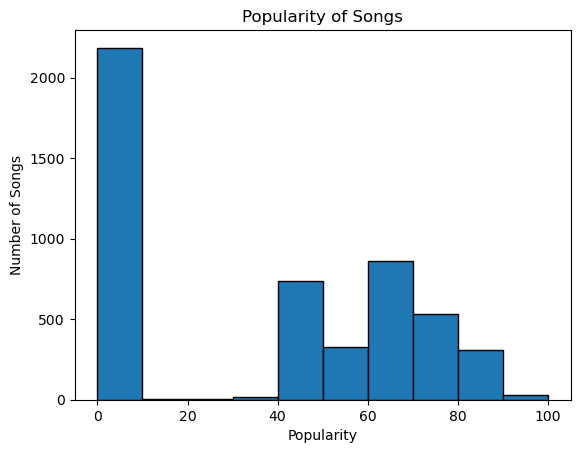

In [92]:
data['popularity'].plot(
    kind='hist', 
    edgecolor='black'
)

# Add title and labels
plt.title("Popularity of Songs")
plt.xlabel("Popularity")
plt.ylabel("Number of Songs")

# Show the plot
plt.show()


Right-skewed: The distribution is skewed to the right, indicating that most songs have a relatively low popularity, while a few songs have exceptionally high popularity.  

Peak: The peak of the histogram is around 0-10, suggesting that the most common range of song popularity is between 0 and 10.


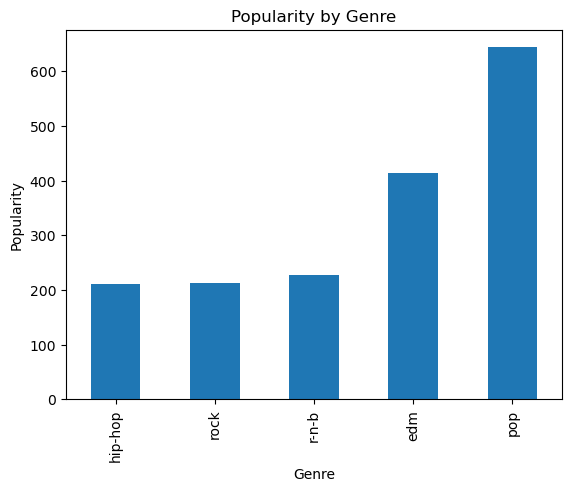

In [93]:

bar_graph = data.sample(50).groupby("genre")["popularity"].sum().sort_values()


bar_graph.plot(kind="bar",
               title="Popularity by Genre",
               ylabel="Popularity",
               xlabel="Genre")

plt.show()



In this dataset, we examined the popularity of different genres based on a sample of 50 rows. The analysis shows that R&B is the most popular genre, followed closely by EDM in second place. Pop ranks third, followed by rock, while hip-hop is the least popular genre in this sample.

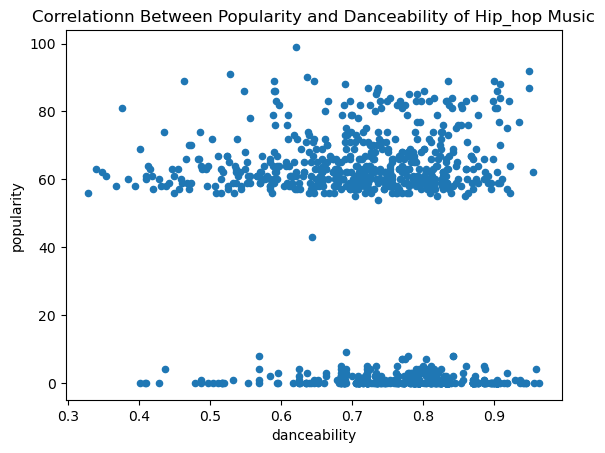

In [94]:
correlation_hiphop = data[data["genre"] == "hip-hop" ]

correlation_hiphop.plot(kind="scatter",
       x="Danceability",
       y="Popularity",
       ylabel="popularity",
       title="Correlationn Between Popularity and Danceability of Hip_hop Music")
plt.show()

Positive Correlation: There seems to be a general positive correlation between popularity and danceability. This suggests that songs with higher danceability tend to be more popular.  

Outliers: There are a few outliers, especially in the lower popularity range with high danceability. These could be songs that are popular for other reasons besides danceability.  

## Machine Learning

## Conclusion